In [1]:
using Plots
gr()

Plots.GRBackend()

## Example

![](./free_cell_fig1.gif)

In [2]:
x = 0.3;
P = [(x, 1.0), (-x, -1.0)];
Q = [(1.0, 0.0), (-1.0, 0.0)];
ϵ = 1.08;

### discretization by $n$

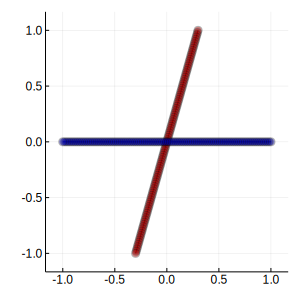

In [3]:
n = 100
wh = 300
L1 = P;
δ1 = (L1[end][1] - L1[1][1], L1[end][2] - L1[1][2]) ./ n
L2 = Q;
δ2 = (L2[end][1] - L2[1][1], L2[end][2] - L2[1][2]) ./ n

d = plot(size=(wh, wh), leg=false, xlims=[-1.1, 1.1], ylims=[-1.1, 1.1])
colors = [:red, :blue]
lδ = [δ1, δ2]
for (id, line) in enumerate([P, Q])
    plot!(d, [line[1][1], line[end][1]], [line[1][2], line[end][2]], color=colors[id])
    
    x0 = line[1][1]
    y0 = line[1][2]
    for i in 0:n
        x = x0 + lδ[id][1] * i
        y = y0 + lδ[id][2] * i
        plot!(d, [x], [y], seriestype=:scatter, color=colors[id], alpha=0.3)
    end
end
d

### Compute Free-space Diagram between two segments

In [4]:
Fϵ = zeros(Float16, n + 1, n + 1);
lx = [(L1[1][1] + δ1[1] * i, L1[1][2] + δ1[2] * i) for i in 0:n]
ly = [(L2[1][1] + δ2[1] * i, L2[1][2] + δ2[2] * i) for i in 0:n]

for dx in 1:n+1
    xi = lx[dx]
    for dy in 1:n+1
        yi = ly[dy]
        
        diffx = xi[1] - yi[1]
        diffy = xi[2] - yi[2]
        dxy = sqrt(diffx ^ 2 + diffy ^ 2)
        Fϵ[dx, dy] = dxy <= ϵ ? 0.0 : 1.0
    end
end

# F = Fϵ[end:-1:1, :];
F = transpose(Fϵ);
# display(F)
println(size(F));

(101, 101)


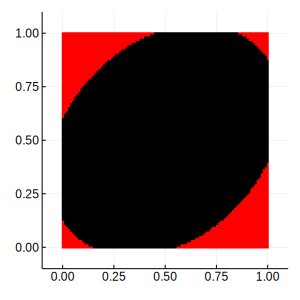

In [5]:
d = plot(size=(wh, wh), leg=false, xlims=[-0.1, 1.1], ylims=[-0.1, 1.1])
vx = collect(0:n) ./ n
vy = collect(0:n) ./ n
heatmap!(d, vx, vy, transpose(F), c=ColorGradient([:black, :red]))
# heatmap!(d, vx, vy, F, c=ColorGradient([:black, :red]))
savefig(d, "output1.png")
d